In [1]:
import numpy as np
from scipy.linalg import inv, lu_solve, lu_factor
import time
import matplotlib.pyplot as plt
import pandas as pd

# Spectral decomposition 

1. [Power iteration](#1.-Power-iteration)
2. [Inverse iteration](#2.-Inverse-iteration)
3. [Rayleigh quotient iteration](#3.-Rayleigh-quotient-iteration)
4. [Compare with library functions](#4.-Compare-with-library-functions)
5. [Compare performance](#5.-Compare-performance)

## 1. Power iteration

In [12]:
def power_iteration(matrix, eps=1e-5):
    vector = np.ones(matrix.shape[0])
    iterations = 0
    while True:
        iterations += 1
        new_vector = np.matmul(matrix, vector)
        new_vector /= np.linalg.norm(new_vector)
        if np.linalg.norm(new_vector - vector) < eps:
            break
        vector = new_vector
    return vector / np.linalg.norm(vector), iterations

## 2. Inverse iteration

In [3]:
def inverse_iteration(matrix, eps=1e-5):
    vector = np.ones(matrix.shape[0])
    iterations = 0

    while True:
        iterations += 1
        

    v0 = np.identity(A.shape[0])[0]
    v, i = 0, 0
    AuI = A - mu * np.identity(A.shape[0])
    lupiv = lu_factor(AuI)
    while i< max_iter:
        i += 1
        v = v0
        w = lu_solve(lupiv, v)
        v = w / np.linalg.norm(w)
        if np.linalg.norm(v-v0) < eps or np.linalg.norm(v + v0) < eps:
            break
        mu = v.T @ A @ v
        v0 = v

    if return_iter:
        return mu, v, i
    return mu, v

## 3. Rayleigh quotient iteration

In [4]:
def rayleigh_quotient_iteration(matrix, eps=1e-5):


def rayleigh_iteration(A: np.array, mu, max_iter: int = 100000, eps: float = 1e-8, return_iter=False):
    """ finding eigen vector using inverse power method, and eigenvalue using Rayleigh quotient
        :param A: matrix
        :param mu: approximation for the eigenvalue corresponding to the desired eigenvector
        :param max_iter: stop algorithm after @max_iter iterations
        :param eps: stop algorithm after reaching desired accuracy
        :param return_iter: returns nr of iterations as third element
        :return: λ, v [,iter]
        """
    v = np.random.rand(A.shape[0])
    i = 0
    while i < max_iter:
        i += 1
        AuI = A - mu * np.identity(A.shape[0])
        w = inv(AuI)@v
        w = w / np.linalg.norm(w)
        mu = (w.T @ A @ w )/(w.T@w)
        if np.linalg.norm(v - w) < eps or np.linalg.norm(v + w) < eps:
            break
        v = w

    if return_iter:
        return mu, v, i
    return mu, v

## 4. Compare with library functions

In [13]:
def compare(func, size=5):
    matrix = 100*np.random.random(size=(size, size))
    result = np.linalg.eig(matrix)
    data = []
    for f in func:
        vec, iter = f(matrix)
        data.append([f.__name__, vec, iter, np.linalg.norm(vec - result[1][0])])
    return pd.DataFrame(data, columns=['Method', 'Vector', 'Iterations', 'Error'])

df = compare([power_iteration, inverse_iteration, rayleigh_quotient_iteration])
df.display()

KeyboardInterrupt: 

## 5. Compare performance

KeyboardInterrupt: 

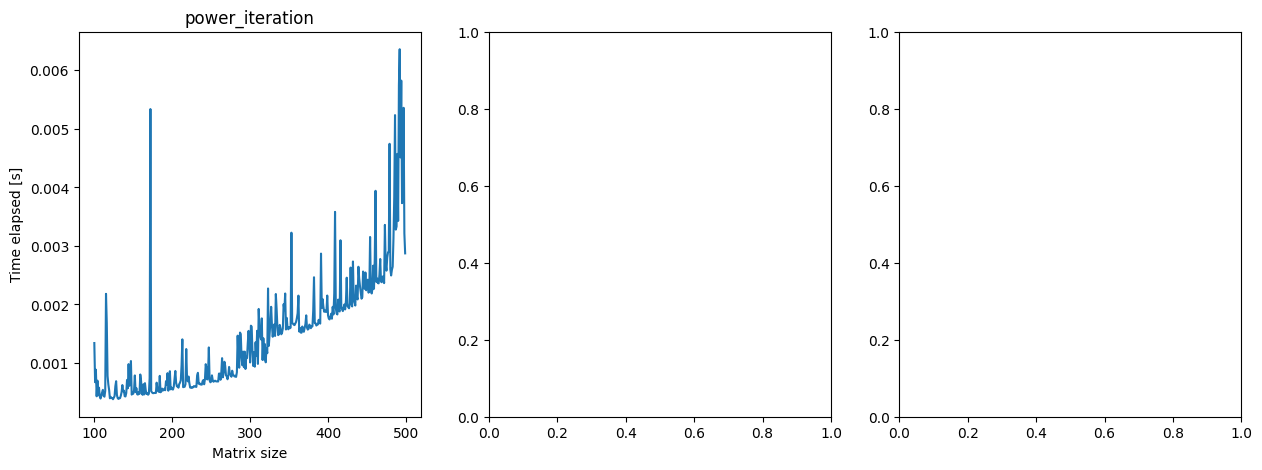

In [10]:
def plot(func, min=100, max=500):
    fig, ax = plt.subplots(1, len(func), figsize=(15, 5))
    for i, f in enumerate(func):
        data = []
        for j in range(min, max):
            start = time.perf_counter()
            f(matrix=100*np.random.random(size=(j,j)))
            data.append(time.perf_counter() - start)
        ax[i].plot(range(min, max), data)
        ax[i].set_title(f.__name__)
        ax[i].set_xlabel("Matrix size")
        ax[i].set_ylabel("Time elapsed [s]")
    plt.show()

plot([power_iteration, inverse_iteration, rayleigh_quotient_iteration])

---